__Finding text using edge detection__

The purpose of this assignment is to use computer vision to extract specific features from images. In particular, we're going to see if we can find text. We are not interested in finding whole words right now; we'll look at how to find whole words in a coming class. For now, we only want to find language-like objects, such as letters and punctuation.

Download and save the image at the link below:

https://upload.wikimedia.org/wikipedia/commons/f/f4/%22We_Hold_These_Truths%22_at_Jefferson_Memorial_IMG_4729.JPG

Using the skills you have learned up to now, do the following tasks:



- Draw a green rectangular box to show a region of interest (ROI) around the main body of text in the middle of the image. Save this as __image_with_ROI.jpg__.
- Crop the original image to create a new image containing only the ROI in the rectangle. Save this as __image_cropped.jpg__.
- Using this cropped image, use Canny edge detection to 'find' every letter in the image
- Draw a green contour around each letter in the cropped image. Save this as __image_letters.jpg__

__TIPS__
- Remember all of the skills you've learned so far and think about how they might be useful
- This means: colour models; cropping; masking; simple and adaptive thresholds; binerization; mean, median, and Gaussian blur.
- Experiment with different approaches until you are able to find as many of the letters and punctuation as possible with the least amount of noise. You might not be able to remove all artifacts - that's okay!

__Bonus challenges__

- If you want to push yourself, try to write a script which runs from the command line and which takes any similar input (an image containing text) and produce a similar output (a new image with contours drawn around every letter).

__General instructions__

- For this exercise, you can upload either a standalone script OR a Jupyter Notebook
- Save your script as edge_detection.py OR edge_detection.ipynb
- If you have external dependencies, you must include a requirements.txt
- You can either upload the script here or push to GitHub and include a link - or both!
- Your code should be clearly documented in a way that allows others to easily follow along
- Similarly, remember to use descriptive variable names! A name like cropped is more readable than crp.
- The filenames of the saved images should clearly relate to the original image

__Purpose__

This assignment is designed to test that you have a understanding of:

- how to use a variety of image processing steps;
- how to perform edge detection;
- how to combine these skills in order to find specific features in an image

# First task:

Draw a green rectangular box to show a region of interest (ROI) around the main body of text in the middle of the image. Save this as __image_with_ROI.jpg__.

In [1]:
#Loading packages:
import os 
import sys
sys.path.append(os.path.join(".."))
import cv2
import numpy as np
from utils.imutils import jimshow
from utils.imutils import jimshow_channel
import matplotlib.pyplot as plt

In [2]:
#Loading data:
fname = os.path.join("..","data","img", "WHTT.jpg")

In [3]:
#Reading the "WHTT.jpg"-file and saving it as 'image':
image = cv2.imread(fname)

In [ ]:
#Printing image (as a sanity check to ensure that it is loaded correctly):
jimshow(image) #Output left out due to filesize constraints on github.

In [5]:
#Printing image shape to know which ballpark i need my rectangle to be within:
image.shape #Note that the following output is height, width (opposite of what is expected).

(3240, 4320, 3)

In [6]:
#Draw green box (start- and end coordinates are estimated through trial and error)

cv2.rectangle(image, (1370,880), (2890,2800), (0,255,0), 2) #Arguments: Specify image, start coordinates (x, y), end coordinates (x, y), color (BGR), line thickness.

array([[[144, 165, 173],
        [144, 165, 173],
        [145, 166, 174],
        ...,
        [139, 136, 131],
        [139, 136, 131],
        [138, 135, 130]],

       [[147, 168, 176],
        [147, 168, 176],
        [146, 167, 175],
        ...,
        [139, 136, 131],
        [140, 137, 132],
        [140, 137, 132]],

       [[148, 169, 177],
        [147, 168, 176],
        [145, 166, 174],
        ...,
        [138, 135, 130],
        [139, 136, 131],
        [140, 137, 132]],

       ...,

       [[128, 126, 125],
        [126, 124, 123],
        [125, 123, 122],
        ...,
        [160, 155, 152],
        [162, 157, 154],
        [159, 154, 151]],

       [[128, 126, 125],
        [125, 123, 122],
        [123, 121, 120],
        ...,
        [160, 155, 152],
        [159, 154, 151],
        [156, 151, 148]],

       [[127, 125, 124],
        [124, 122, 121],
        [121, 119, 118],
        ...,
        [161, 156, 153],
        [159, 154, 151],
        [158, 153, 150]]

In [ ]:
#Printing square-image:
jimshow(image) #Output left out due to filesize constraints on github.

In [8]:
#Saving image.
filepath, _ = os.path.split(fname) #Taking the first part of the filepath for the original image and save it as filepath.
outfile = os.path.join(filepath, "image_with_ROI.jpg") #Specify that I want the new file to be named "image_with_ROI.jpg".

In [9]:
#Write "image" as specified in "outfile":
cv2.imwrite(outfile, image) 

True

# Task 2

__Crop the original image to create a new image containing only the ROI in the rectangle. Save this as image_cropped.jpg.__

In [11]:
#Load the original again (to remove the green box):
image = cv2.imread(fname)

In [12]:
#Index the image according to the coordinates specified in the cv2.rectangle function:
image_cropped = image[880:2800,1370:2890,] #Note that the height and width are specified opposite, compared to cv2.

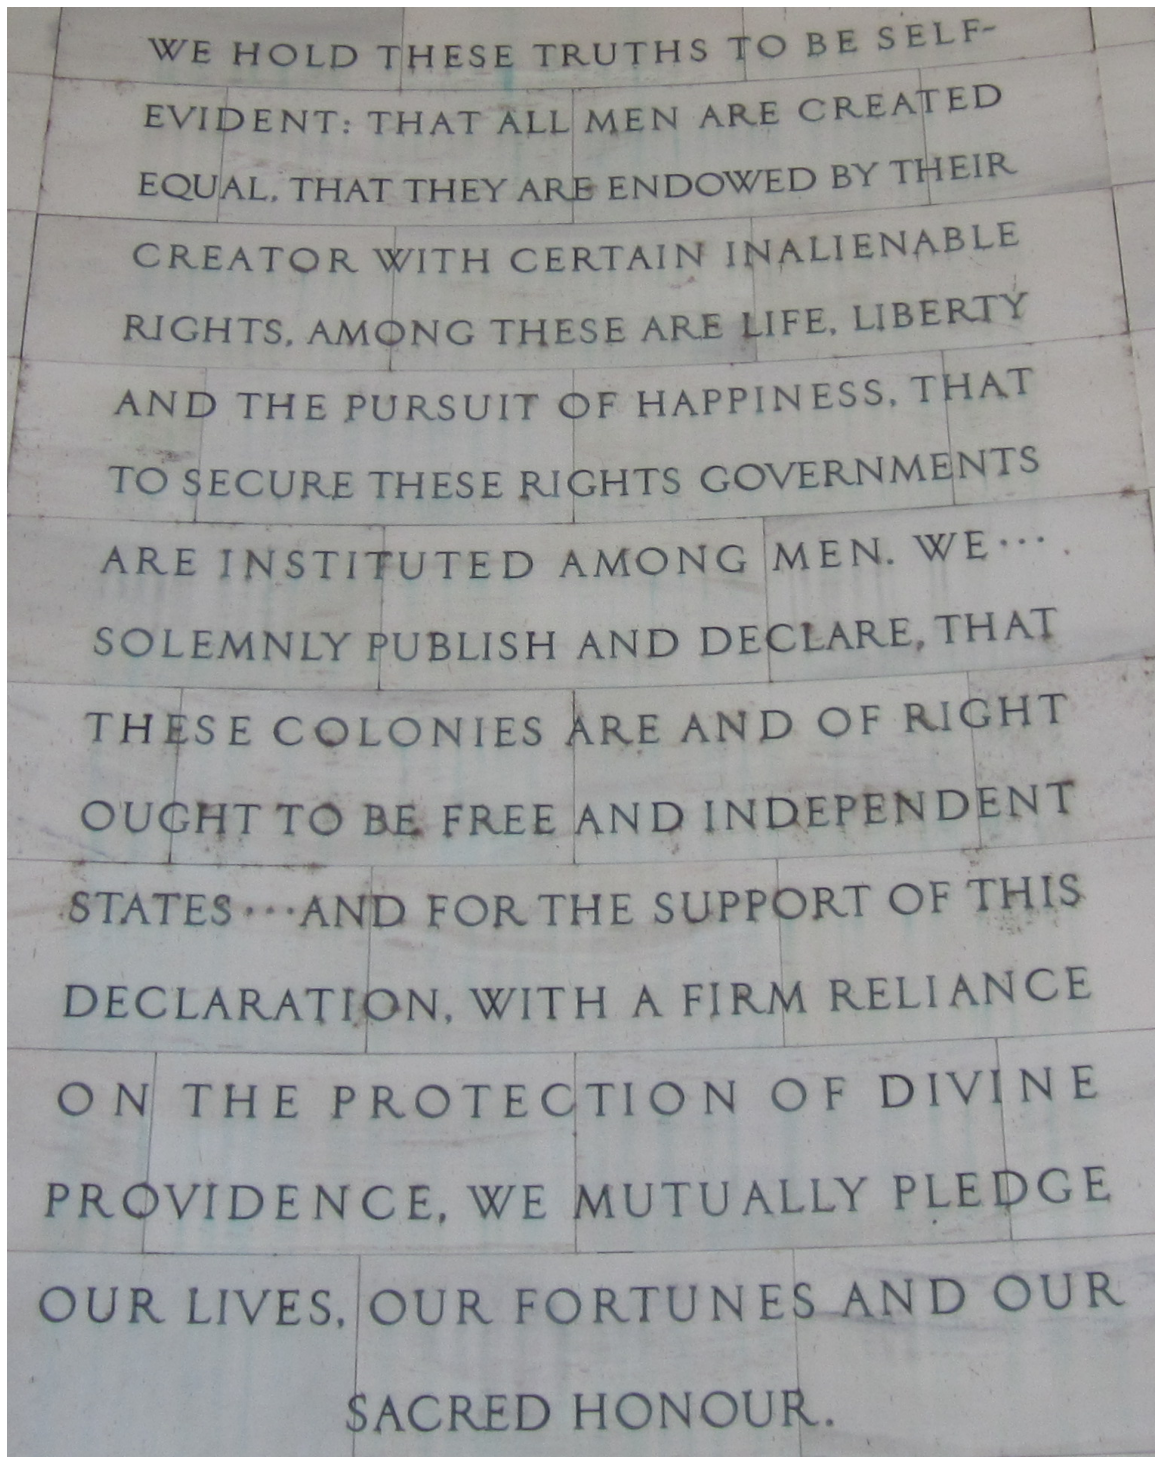

In [13]:
#Plot the cropped image (sanity check):
jimshow(image_cropped)

In [14]:
#Saving image.
filepath, _ = os.path.split(fname) #Taking the first part of the filepath for the original image and save it as filepath.
outfile = os.path.join(filepath, "image_cropped.jpg") #Specify that I want the new file to be named "image_cropped.jpg".

In [15]:
#Write "image" as specified in "outfile":
cv2.imwrite(outfile, image_cropped) 

True

# Task 3

__Using this cropped image, use Canny edge detection to 'find' every letter in the image__

In [16]:
#Make the image greyscale (for Canny edge detection):
grey_image = cv2.cvtColor(image_cropped, cv2.COLOR_BGR2GRAY)

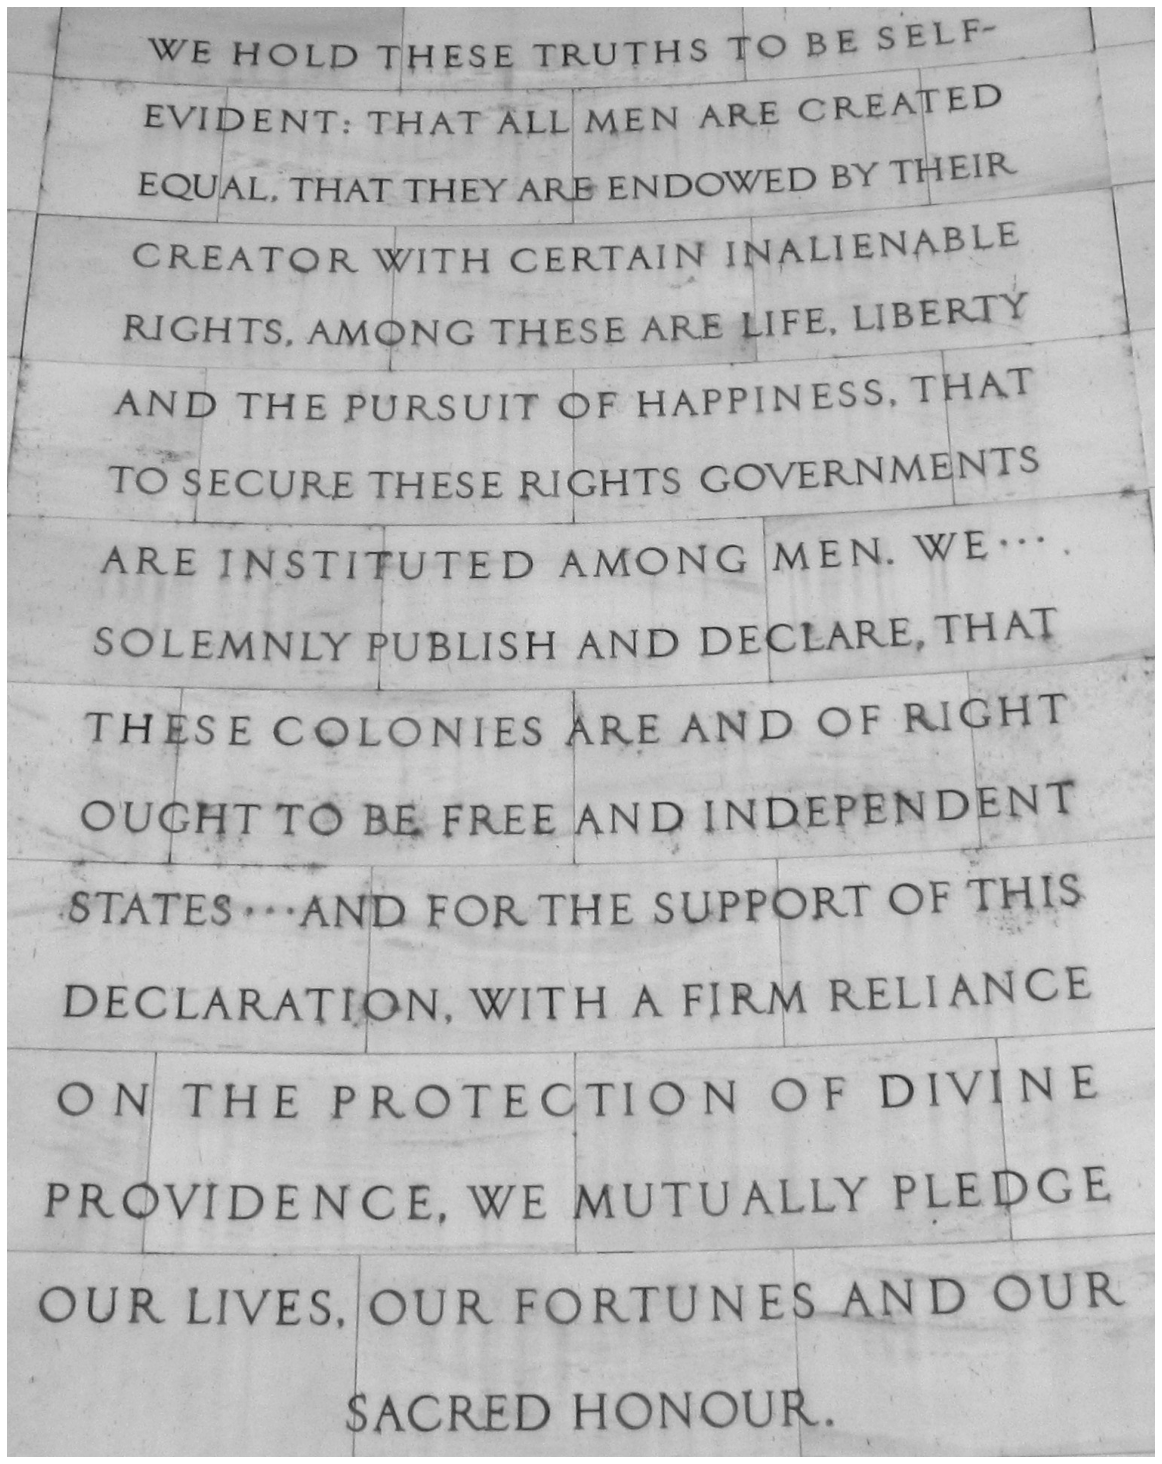

In [17]:
#Plot the image to ensure that the transformation worked (sanity check).
jimshow_channel(grey_image)

In [18]:
#Blur the image
blurred = cv2.GaussianBlur(grey_image, (5,5), 0)

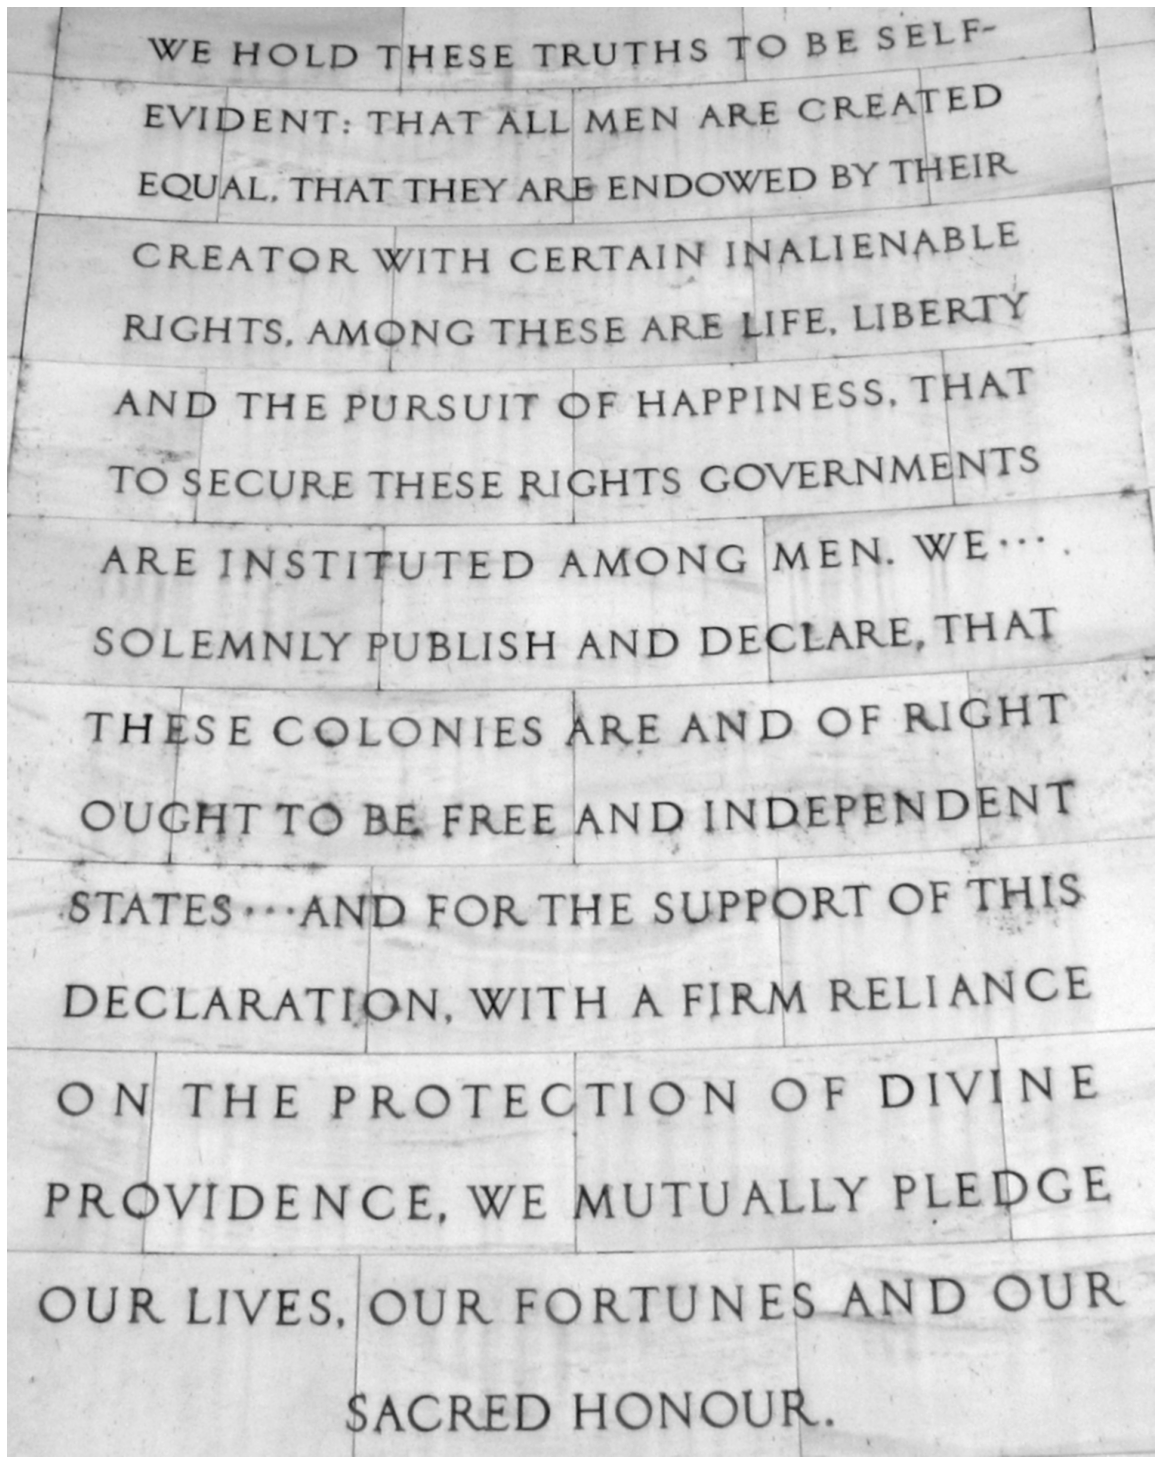

In [19]:
#Plot the image to ensure that the transformation worked (sanity check).
jimshow_channel(blurred)

In [20]:
#Use canny edge detection:
canny = cv2.Canny(blurred, 80, 150) #Parameters specified through trial and error.

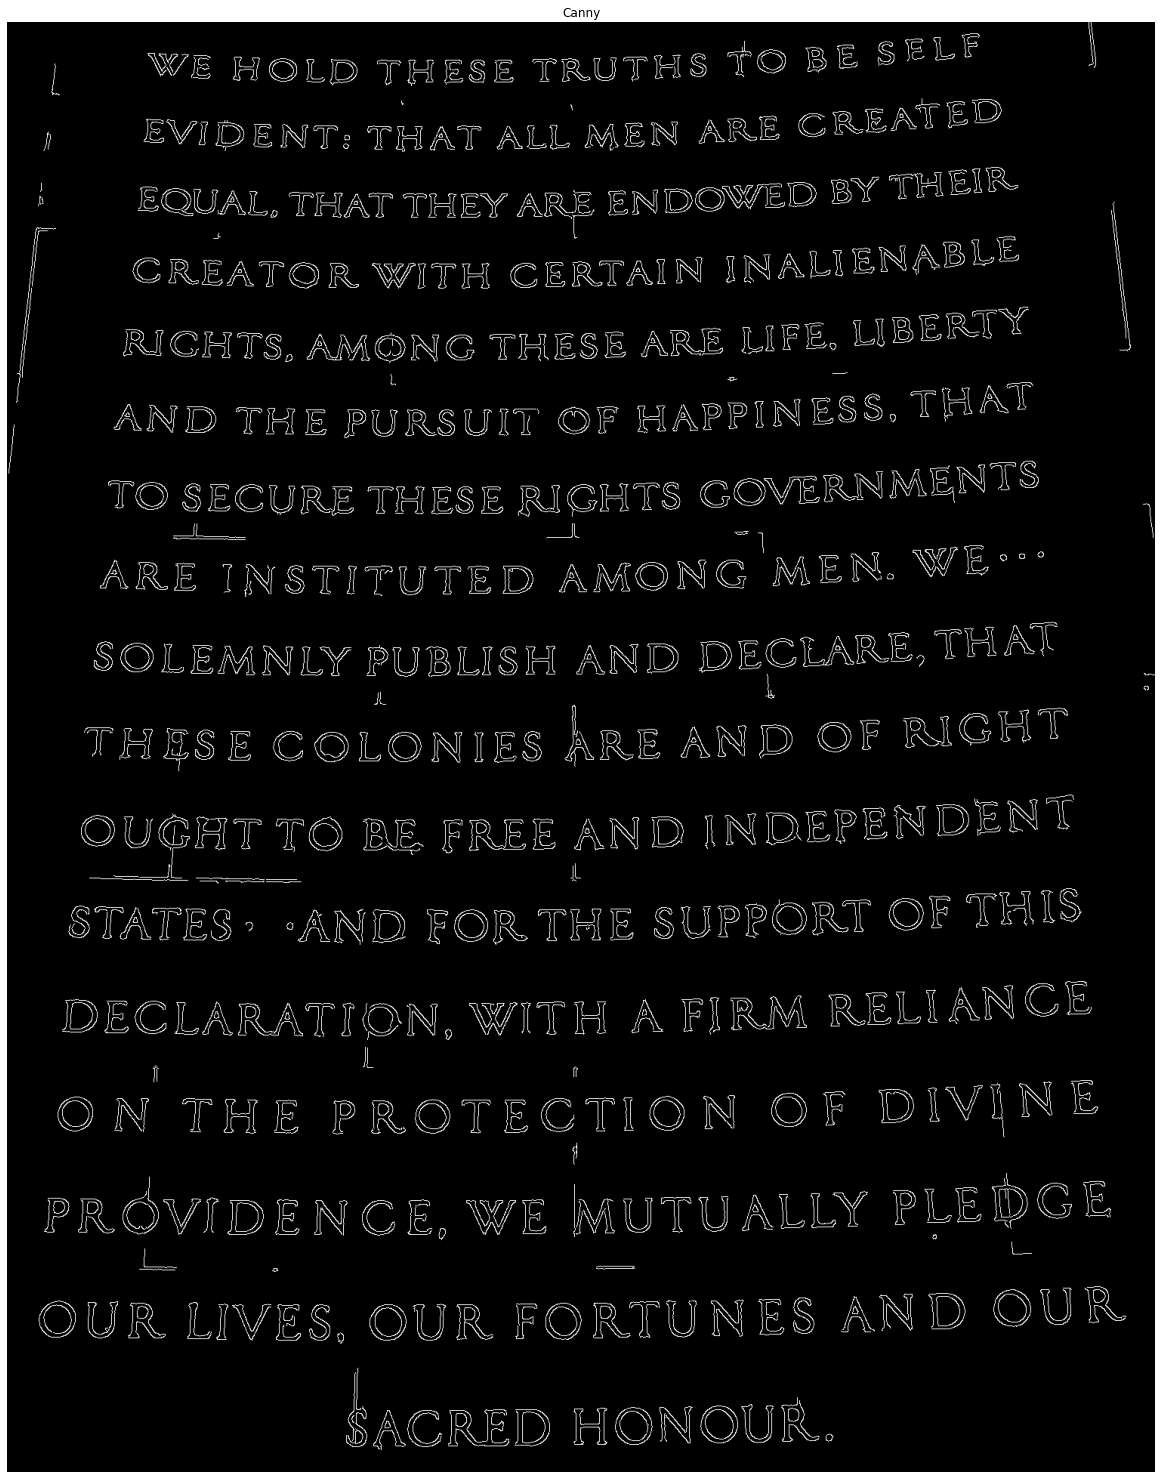

In [21]:
#Plot the image to ensure that the transformation worked (sanity check).
jimshow_channel(canny, "Canny")

# Task 4

__Draw a green contour around each letter in the cropped image. Save this as image_letters.jpg__

In [22]:
#Find controus and save them as "contours":
(contours, _) = cv2.findContours(canny.copy(), 
                 cv2.RETR_EXTERNAL,
                 cv2.CHAIN_APPROX_SIMPLE)

In [23]:
#Draw contours on cropped image and save the new image as "image_contour":
image_contour = cv2.drawContours(image_cropped.copy(), #Draw contours on copy of original image
                                   contours, #our list of contours
                                   -1, #Which contours to draw
                                   (0,0,200), #Contour colout
                                   2) #contour pixel width

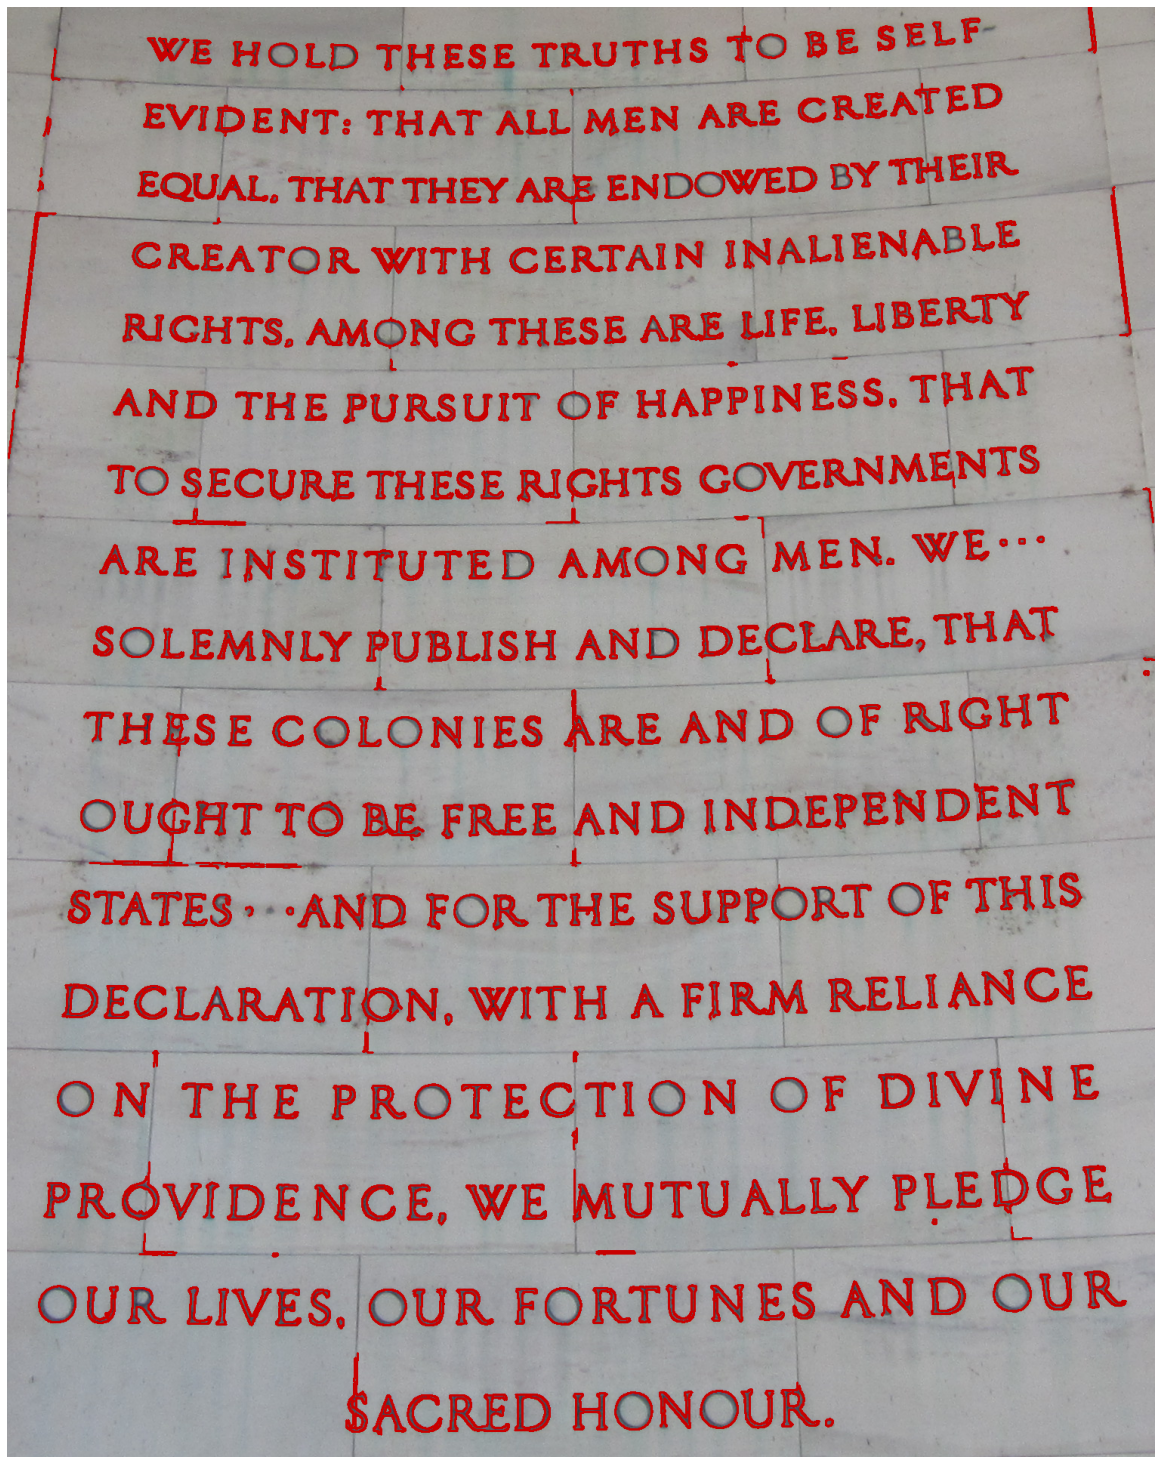

In [24]:
#Pring "image_contour" to ensure that the transformation was done correctly (sanity check):
jimshow(image_contour)

In [25]:
#Saving image.
filepath, _ = os.path.split(fname)
outfile = os.path.join(filepath, "image_letters.jpg")

In [26]:
cv2.imwrite(outfile, image_contour)

True